<div class="alert alert-block alert-warning">

# Random Forest Exercises

* Work with titanic data to do the following:

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

#custom imports
from prepare import prep_titanic, split_data
from acquire import new_titanic_data

#### Acquire

In [2]:
# Acquire data
titanic = prep_titanic(new_titanic_data())
titanic.head()


,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [3]:
titanic['sex'] = titanic.sex.map({'male': 1, 'female': 0})
titanic['embark_town'] = titanic.embark_town.map({'Southampton': 0, 'Queenstown': 1, 'Cherbourg': 2})

In [4]:
# take a look
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,1,1,0,7.2500,0,0
1,1,1,0,1,0,71.2833,2,0
2,1,3,0,0,0,7.9250,0,1
3,1,1,0,1,0,53.1000,0,0
4,0,3,1,0,0,8.0500,0,1


#### Prepare

In [5]:
# Train, validate, split data
train, validate, test = split_data(titanic, 'survived')

In [6]:
train.info

<bound method DataFrame.info of      survived  pclass  sex  sibsp  parch     fare  embark_town  alone
818         0       3    1      0      0   6.4500            0      1
98          1       2    0      0      1  23.0000            0      0
825         0       3    1      0      0   6.9500            1      1
573         1       3    0      0      0   7.7500            1      1
322         1       2    0      0      0  12.3500            1      1
..        ...     ...  ...    ...    ...      ...          ...    ...
446         1       2    0      0      1  19.5000            0      0
491         0       3    1      0      0   7.2500            0      1
503         0       3    0      0      0   9.5875            0      1
748         0       1    1      1      0  53.1000            0      0
406         0       3    1      0      0   7.7500            0      1

[310 rows x 8 columns]>

#### Isolate the target variable

In [7]:
# we know what our X and y are, let's be explicit about defining them
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = validate.drop(columns='survived')
y_val = validate.survived

X_test = test.drop(columns='survived')
y_test = test.survived

#### Create the baseline

In [8]:
baseline = y_train.mode()
baseline_accuracy = y_train == 0
print(f"Baseline prediction: {(baseline[0])}")
print(f"Baseline accuracy: {(baseline_accuracy.mean())}")


Baseline prediction: 0
Baseline accuracy: 0.6161290322580645


<div class="alert alert-block alert-success">

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [9]:
#create the model
forest1 = RandomForestClassifier(min_samples_leaf= 1, max_depth=10, random_state=42)

In [10]:
#fit the model
forest1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [11]:
#get the predictions
y_predictions = forest1.predict(X_train)

<div class="alert alert-block alert-success">

2. Evaluate your results using the model score, confusion matrix, and classification report.

#### Model score

In [12]:
#get accuracy score for first model
forest1.score(X_train, y_train)

0.9387096774193548

#### Confusion Matrix

In [13]:
conf = confusion_matrix(y_train, y_predictions)
conf

array([[184,   7],
       [ 12, 107]])

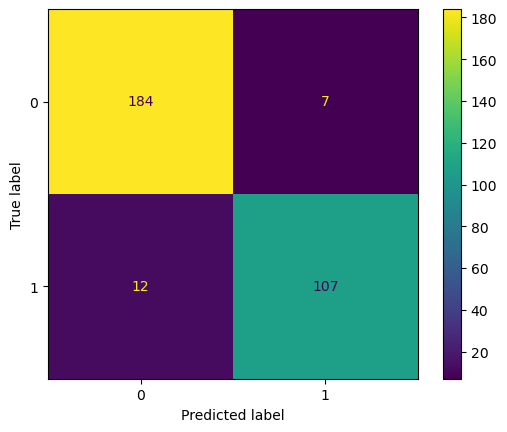

In [14]:
disp_conf = ConfusionMatrixDisplay(confusion_matrix=conf,display_labels=forest1.classes_)
disp_conf.plot()

#### Classification report

In [15]:
report = classification_report(y_train, y_predictions, output_dict=True)

print("Tree of depth 10")
pd.DataFrame(report)

Tree of depth 10


,0,1,accuracy,macro avg,weighted avg
precision,0.938776,0.938596,0.93871,0.938686,0.938707
recall,0.963351,0.899160,0.93871,0.931255,0.938710
f1-score,0.950904,0.918455,0.93871,0.934680,0.938448
support,191.000000,119.000000,0.93871,310.000000,310.000000


<div class="alert alert-block alert-success">

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [16]:
#.ravel returns a contigious array
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(184, 7, 12, 107)

In [17]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
print(f"Accuracy: {round(acc*100, 2)}")

# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
print(f"True Positive Rate: {round(TPR*100, 2)}")

# false positive rate
FPR = FP / (FP + TN)
print(f"False Positive Rate: {round(FPR*100, 2)}")

# true negative rate
TNR = TN / (TN + FP)
print(f"True Negative Rate: {round(TNR*100, 2)}")

# false negative rate
FNR = FN / (FN + TP)
print(f"False Negative Rate: {round(FNR*100, 2)}")

# precision
precision = TP / (TP + FP)
print(f"Precision: {round(precision*100, 2)}")

# f1
f1_score = 2 * (precision*recall) / (precision+recall)
print(f"F1 score: {round(f1_score*100, 2)}")

# support
support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 93.87
True Positive Rate: 89.92
False Positive Rate: 3.66
True Negative Rate: 96.34
False Negative Rate: 10.08
Precision: 93.86
F1 score: 91.85
Support (0): 119
Support (1): 191


<div class="alert alert-block alert-success">

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [18]:
# for-loop through so we can compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=42)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,18,0.887097,0.783582,0.103515
1,3,17,0.858065,0.768657,0.089408
2,4,16,0.848387,0.776119,0.072268
3,5,15,0.832258,0.783582,0.048676
4,6,14,0.835484,0.783582,0.051902
5,7,13,0.816129,0.791045,0.025084
6,8,12,0.822581,0.791045,0.031536
7,9,11,0.822581,0.798507,0.024073
8,10,10,0.816129,0.798507,0.017622
9,11,9,0.812903,0.776119,0.036784


<div class="alert alert-block alert-success">

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

#### only using max_depth evaluaiton metrics

In [19]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=42)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.809677,0.731343,0.078334
1,3,0.806452,0.731343,0.075108
2,4,0.832258,0.776119,0.056139
3,5,0.858065,0.783582,0.074482
4,6,0.890323,0.798507,0.091815
5,7,0.906452,0.791045,0.115407
6,8,0.929032,0.798507,0.130525
7,9,0.938710,0.798507,0.140202
8,10,0.938710,0.798507,0.140202
9,11,0.938710,0.783582,0.155128


<div class="alert alert-block alert-success">

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

* min_samples_leaf ~ 8 and max-depth ~ 8 performs the best for close metrics

#### Decreasing min_samples_leaf and increasing max_depth

In [20]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = max_depth + i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,22,2,0.793548,0.716418,0.077130
1,23,3,0.787097,0.716418,0.070679
2,24,4,0.790323,0.716418,0.073905
3,25,5,0.790323,0.716418,0.073905
4,26,6,0.783871,0.716418,0.067453
5,27,7,0.787097,0.716418,0.070679
6,28,8,0.783871,0.716418,0.067453
7,29,9,0.783871,0.716418,0.067453
8,30,10,0.783871,0.716418,0.067453
9,31,11,0.780645,0.716418,0.064227


#### Increase both min_samples_leaf and max_depth

In [21]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.803226,0.716418,0.086808
1,3,3,0.816129,0.753731,0.062398
2,4,4,0.829032,0.768657,0.060376
3,5,5,0.829032,0.768657,0.060376
4,6,6,0.838710,0.783582,0.055128
5,7,7,0.832258,0.776119,0.056139
6,8,8,0.829032,0.776119,0.052913
7,9,9,0.829032,0.768657,0.060376
8,10,10,0.803226,0.723881,0.079345
9,11,11,0.803226,0.723881,0.079345


#### Fixed max_depth and increasing min_samples_leaf

In [22]:
metrics = []


for i in range(2, 25):
    # Make the model
    depth = 6
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,6,0.861290,0.768657,0.092634
1,3,6,0.861290,0.761194,0.100096
2,4,6,0.841935,0.768657,0.073279
3,5,6,0.838710,0.783582,0.055128
4,6,6,0.838710,0.783582,0.055128
5,7,6,0.832258,0.776119,0.056139
6,8,6,0.825806,0.746269,0.079538
7,9,6,0.816129,0.746269,0.069860
8,10,6,0.800000,0.723881,0.076119
9,11,6,0.803226,0.723881,0.079345
